HOW TO USE CONSPR SOLVER
========================

Pre-requisite
-------------
You must have the following programs installed on your computer:
* Python 2.6   (not 2.5 or older, nor 3.0 !)
* numpy
* matplotlib  (smaller package can be obtained in version 0.9 or older, 
where the basemap library was not included)

Recommended:
* ipython

How to install
--------------
+ On Windows: download the following installation files and execute one after another:

http://www.python.org/ftp/python/2.6.2/python-2.6.2.msi
http://sourceforge.net/projects/numpy/files/NumPy/numpy-1.3.0-win32-superpack-python2.6.exe
http://sourceforge.net/projects/matplotlib/files/matplotlib/matplotlib-0.98.5.3.win32-py2.6.exe

(the exe files for Windows 64-bit are also available)

+ On Linux: you must have administrator account
For Ubuntu / Debian users:
$ sudo apt-get install python python-numpy python-matplotlib

For Red Hat / Fedora Core, etc. users
Seek for .rpm packages with similar names


Setting up a simple case (the river case in presentation slides)
----------------------------------------------------------------

In [1]:
from solver import Param, Domain
par = Param()
river = Domain(par, type='river')

Show the model dimensions

In [2]:
river.nx, river.ny, river.dx, river.dy

(40, 40, 10, 40)

Show the following parameters: Che'zy, dispersion coefs.

In [3]:
par.Ch, par.Elong, par.Etran

(65, 0, 0)

Plot result 

Make two plots; the first shows the plan view, bed level, flow velocity vectors; the second shows a cross-section.

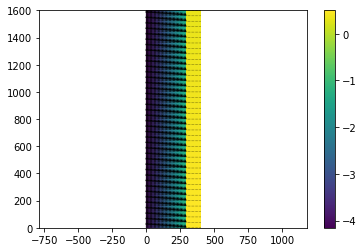

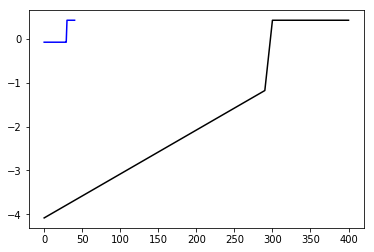

In [5]:
from pylab import pcolor, quiver, colorbar, plot, figure, show, axis
%matplotlib inline
pcolor(river.x, river.y, river.zb); colorbar(); 
quiver(river.x, river.y, river.uu, river.vv); axis('equal'); 
figure(2); plot(river.x[:,20], river.zb[:,20], 'k', river.zs[:,20], 'b'); 

Invoke the system to run for 100 time steps

In [6]:
for i in range(100):
    river.solve(par)

TypeError: 'float' object cannot be interpreted as an integer

In [11]:
par.hmin

0.001

# What is the simulation time now ? (t = 50 s)
In [19]: par.t
Out[19]: 50

# What is the time step? (this time step is automatically chosen
# to satisfy the Courant stability criterion
In [20]: par.dt
Out[20]: 0.47061996317980626

# You can repeat input In[12] to see the flow condition now ...
# Nothing changed, huh? That is because the flow is quite steady.

# Now we accidentally spill some contaminant in the river, so that
# the color volumes in the row [5,12] to [9,12] will have a 
# concentration of, say 2 ppt
In [30]: river.c[5:10, 12] = 2

# Remember to type river.c and not river.C  !

# ... what would happen after 100 time steps?
In [31]: for i in range(100): river.solve(par)
   ....: 

# the distribution of the contaminant is now ...
In [32]: pcolor(river.x, river.y, river.c); colorbar(); \
quiver(river.x, river.y, river.uu, river.vv); axis('equal'); show(); 

# To enlarge (zoom in) the plot,
# Click on the four-directional arrow icon of the plotting toolbar,
# then move your mouse cursor into the plotting area
# hold down RIGHT mouse button and drag upwards

# Close the plot. Now let's make longitudinal and transversal plots of
# contaminant spreading...
In [54]: import numpy

In [56]: plot(river.y[5,:], numpy.transpose(river.c[5:10,:])); \
figure(); plot(river.x[:,11], river.c[:,11:15]); show()

These two plots conclude my introduction to use conspr.

Should you have questions, please email to nguyenquangchien at gmail 
dot com.

This file is a Free Document (GFDL) generated in Windows plain text
format (lines end with CR+LF)